# **Pre-Lecture**

## Question 1

1. The difference between Simple Linear Regression and Multiple Linear Regression is, SLR uses only one predictor variable to model the relationship with the outcome variable. MLR uses two or more predictor variables to model the relationship with the outcome variable. <br>

   (a) SLR aims to find the line of best fit, and MLR aims to find the plane of best fit. <br>
   
   (b) Benefits of MLR over SLR: <br>
   
       1. Can model complex relationships  
       
       2. Increased predictive power   
       
       3.  Can understand individual predictor effects: MLR allows you to isolate the effect of a specific predictor variable on the outcome while controlling for the influence of other predictors.  
       
        4. Modeling Non-linear Relationships: MLR can model some non-linear relationships by incorporating transformed predictor variables.  
        
        5. MLR can seamlessly handle categorical variables (variables with distinct categories) using indicator variables. MLR expands gthe range of questions I can investigate. SLR struggles with categorical variables. 

2. A continuous variable in SLR are numeric variables that can take on a wide range of values within a given interval. They're used as predictor variables and help model a continous linear relationship with the outcome variable. An indicator variable (dummy variables) are binary variables used to represent categorical data. They indicate whether a particular category is present or absent for a given observation. Indicator variables allow you to integrate categorical data into regression models. 

        (a) Continuous variable linear form: 
            outcome = β0 + β1(predictor + ε) 
            
        (b) Indicator variable linear form: 
            Categorical_data = β0 + β1(indicator_B + β2)(indicator_C + ε)
            
3. When a single indicator variable is introduced alongside a continuous variable in a MlR, then the model can now capture potential differences in the average outcome between these two groups, even when the continuous predictor is held constant: what graphically happens to the model is a new model is created in which different intercepts for the two groups represented by the indicator variable is now allowed.

        (a) Simple Linear Regression: Y_i = β0 + β1 * x_i + ε_i

        (b) Multiple Linear Regression: Y_i = β0 + β1 * X_1i + β2 * X_2i + ... + βk * X_ki + ε_i

        (c) Mathematical differences: MLR has multiple predictor variables, and each have their own slope coefficients. SLR has one predictor variable and one slope coefficient. MLR is an expansion of SLR by allowing for the consideration of multiple predictors on the outcome variable. 

4. The effect of adding an interaction between a continuous and an indicator variable in MLR is, it allows the slope of the relationship between the continuous predictor and the outcome to vary depending on the group membership indicated by the indicator variable. The effect of the continuous predictor on the outcome is no longer constant across all groups but now differs depending on the specific category of the indicator variable. 

        (a) Without interaction: Y = β0 + β1 * x + β2 * k + ε 
        1. β1 represents the constant effect across all categories
    
        (b) With interaction: Y = β0 + β1 * x + β2 * k + β3 * x * k + ε
        1. β3 captures the difference in slopes now present with an interaction.

5. When a Multiple Linear Regression model is based only on indicator variables derived from a single non-binary categorical varaible, it performs group comparisons, similar to an ANOVA (analysis of variance) test. 

        (a) The non-binary categorical variable extends the use of indicator variables from a simple two-group comparison to situations involving more than two groups. 
       
        (b) For a categorical predictor variable, the creation of K-1 binary indicator variables is necessary, where K represents the number of categories. This process is how one avoids redundancy. Knowing the values of K-1 indicator variables automatically determines the value of the remaining indicator variable. 

        (c) The linear form: Y = β0 + β1 * 1_[B] + β2 * 1_[C] + ε
            1. A, B, and C represent three different groups. 
            
        (d) The model's intercept (β0) represents the mean of the baseline group, which is the group for which all indicator variables are 0. The coefficients for the remaining indicator variables (β1, β2, ... , βn) represent the differences in means between each respective group and the baseline group. 


## Question 2

1. The outcome variable would be the effectiveness of the advertising campaigns, which would need to be specifically defined (sales revenue, web traffic, or some quantifiable metric that reflects the success of advertising).

2. The predictor variable would be the amount spent on TV advertising and the amount spent on online advertising, both of which are continuous variables. 

Meaningful Interactions: 

1. A potential meaningful interaction could be that a certain level of spending on online advertising might enhance the effectiveness of TV ads. Similarly, low online ad spending could diminish the impact of TV ads. 

        (a) Continuous Linear Forms without interaction: 
        Sales = β0 + β1 * TV_Spending + β2 * Online_Spending + ε
        
            1. β1 captures the average change in sales for a marginal increase in TV spending, holding online spending constant. β2 reflects the average change in sales for a marginal increase in online spending, holding TV spending constant. This model assumes β1 and β2 are independent of each other. 
        
        (b) Continuous Linear Forms with interaction: 
        Sales = β0 + β1 * TV_Spending + β2 * Online_Spending + β3 * (TV_Spending * Online_Spending) + ε
            1. β1 now represents the effect of TV spending on sales when online spending is 0 (baseline group)
            2. β2 represents the effect of online spending on sales when TV spending is zero
            
            3. β3 represents the interaction effect, quantifying how the effect of TV spending on sales changes for each unit increase in online spending. A positive β3 would indicate a synergistic effect, while a negative β3 would suggest a dampening effect.
            
        (c) Binary Linear Form, No interaction: 
        Sales = β0 + β1 * TV_High + β2 * Online_High + ε 
            1. TV_high and Online_High are indicator variables. TV_High = 1 if TV budget is high, 0 if low. Online_High = 1 if online budget is high, 0 if low. 
            
        (d) Binary Linear form, With Interaction
        Sales = β0 + β1 * TV_High + β2 * Online_High + β3 * (TV_High * Online_High) + ε
            

## Question 3

In [10]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import pandas as pd
import patsy

# Load data from URL
titanic = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")
titanic = titanic[["Survived", "Pclass", "Sex", "Age", "Embarked"]]
titanic = titanic.dropna()

# Rename columns to match expected column names
titanic.columns = ["survived", "pclass", "sex", "age", "embarked"]

# Convert 'sex' and 'embarked' to dummy variables
titanic = pd.get_dummies(titanic, columns=["sex", "embarked"], drop_first=True)

# Define and fit model
log_reg = smf.logit("survived ~ sex_male + age + embarked_Q + embarked_S", data=titanic).fit()

# Summary of results
print(log_reg.summary())

# Inspect parameters
print(log_reg.params)

# List available methods and attributes of log_reg
print(dir(log_reg))

# Calculate odds ratios with confidence intervals
odds_ratios = pd.DataFrame(
    {
        "OR": log_reg.params,
        "Lower CI": log_reg.conf_int()[0],
        "Upper CI": log_reg.conf_int()[1],
    }
)
odds_ratios = np.exp(odds_ratios)
print(odds_ratios)

# Using patsy for matrix creation
y, X = patsy.dmatrices("survived ~ sex_male + age + embarked_Q + embarked_S", data=titanic, return_type="dataframe")

formula = "survived ~ C(pclass, Treatment(reference=3))"
log_reg = smf.logit(formula, data=titanic).fit()

fit_summary = log_reg.summary().tables[0]

print(log_reg.summary())

print(log_reg.summary(xname=["1st class", "2nd class", "3rd class"]))

Optimization terminated successfully.
         Current function value: 0.509889
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      707
Method:                           MLE   Df Model:                            4
Date:                Fri, 15 Nov 2024   Pseudo R-squ.:                  0.2444
Time:                        01:54:12   Log-Likelihood:                -363.04
converged:                       True   LL-Null:                       -480.45
Covariance Type:            nonrobust   LLR p-value:                 1.209e-49
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.2046      0.322      6.851      0.000       1.574       2.835
sex_m

In [11]:
print(log_reg.summary())

print(log_reg.summary(xname=["1st class", "2nd class", "3rd class"]))

                           Logit Regression Results                           
Dep. Variable:               survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      709
Method:                           MLE   Df Model:                            2
Date:                Fri, 15 Nov 2024   Pseudo R-squ.:                 0.09657
Time:                        01:54:12   Log-Likelihood:                -434.06
converged:                       True   LL-Null:                       -480.45
Covariance Type:            nonrobust   LLR p-value:                 7.088e-21
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -1.1558      0.124     -9.293      0.000      -1.400      -0.912
C(pclass, Treatment(reference=3))[T.1]     1.78

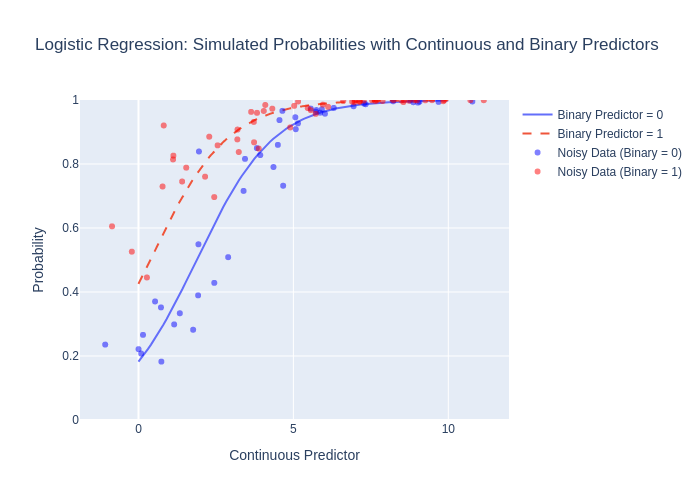

In [12]:
import numpy as np
import plotly.graph_objects as go

# Pretend model coefficients for a continuous and binary predictor
intercept = -1.5
coef_continuous = 0.8  # Coefficient for a continuous variable
coef_binary = 1.2      # Coefficient for a binary variable

# Simulate predictor data
np.random.seed(42)
continuous_data = np.linspace(0, 10, 100)  # Continuous predictor range
binary_data = np.random.choice([0, 1], size=100)  # Binary predictor values (0 or 1)

# Calculate linear predictor values (log-odds)
log_odds_0 = intercept + coef_continuous * continuous_data  # For binary = 0
log_odds_1 = intercept + coef_continuous * continuous_data + coef_binary  # For binary = 1

# Simulate random noise for continuous data
noise = np.random.normal(0, 1, size=100)
continuous_data_noisy = continuous_data + noise

# Calculate probabilities from log-odds using logistic transformation
prob_0 = 1 / (1 + np.exp(-log_odds_0))  # For binary = 0
prob_1 = 1 / (1 + np.exp(-log_odds_1))  # For binary = 1

# Create figure and plot the lines and noisy data
fig = go.Figure()

# Plot line for binary = 0
fig.add_trace(go.Scatter(
    x=continuous_data, y=prob_0, mode='lines', name='Binary Predictor = 0', line=dict(dash='solid')
))

# Plot line for binary = 1
fig.add_trace(go.Scatter(
    x=continuous_data, y=prob_1, mode='lines', name='Binary Predictor = 1', line=dict(dash='dash')
))

# Plot noisy data points for binary = 0
fig.add_trace(go.Scatter(
    x=continuous_data_noisy[binary_data == 0],
    y=prob_0[binary_data == 0],
    mode='markers',
    name='Noisy Data (Binary = 0)',
    marker=dict(color='blue', opacity=0.5)
))

# Plot noisy data points for binary = 1
fig.add_trace(go.Scatter(
    x=continuous_data_noisy[binary_data == 1],
    y=prob_1[binary_data == 1],
    mode='markers',
    name='Noisy Data (Binary = 1)',
    marker=dict(color='red', opacity=0.5)
))

# Update layout for better visualization
fig.update_layout(
    title="Logistic Regression: Simulated Probabilities with Continuous and Binary Predictors",
    xaxis_title="Continuous Predictor",
    yaxis_title="Probability",
    yaxis=dict(range=[0, 1]),  # Probability range
)

fig.show(renderer="png")


### Model Linear Approximation: 
#### Survival Probability = $B_0$ + $B_1$ (sex_male) + $B_2$(age) + $B_3$(embarked_Q) + $B_4$(embarked_s) 

1. The continuous predictor coefficient ($B_1$) represents the change in predicted outcome for each marginal increase in the continuous predictor variable while assuming the binary predictor remains constant. 

2. The Binary Predictor coefficient ($B_2$) shows how the outcome shifts when moving between binary predictor states (which are 0 to 1) while keeping the continuous predictor constant. 

3. Viewing logistical model as a Multivariable Linear Regression Model would mean translating the following relationships as: 

        (a) The continuous predictor linearly  affects the outcome in a similar fashion to linear regression, but here it linearly affects the log odds. 
        
        (b) The binary predictor changes the intercept between two groups, shifting the probabilities between 0 to 1. 
        
In context of the Titanic Dataset... 

1. $B_0$ (AKA the intercept) represents the baseline level of survival for a hypothetical reference group (female passengers, with age 0, embarking from Cherbourg). 

2. $B_1$ (Sex, male coefficient) represents the change in the predicted survival level when the passenger is male instead of female. 

3. $B_2$ (age, continunous coefficient) represents the impact of each additional year of age on the predicted survival level. 

4. $B_3$ and $B_4$ (embarkation location, Queenstown and Southampton respectively) represents the impact of emarkation location on predicted survival level. 



## Question 4

In [13]:
import pandas as pd

url = "https://raw.githubusercontent.com/KeithGalli/pandas/master/pokemon_data.csv"
# fail https://github.com/KeithGalli/pandas/blob/master/pokemon_data.csv
pokeaman = pd.read_csv(url) 
pokeaman

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True


In [14]:
import statsmodels.formula.api as smf

model1_spec = smf.ols(formula='HP ~ Q("Sp. Def") + C(Generation)', data=pokeaman)
model2_spec = smf.ols(formula='HP ~ Q("Sp. Def") + C(Generation) + Q("Sp. Def"):C(Generation)', data=pokeaman)
model2_spec = smf.ols(formula='HP ~ Q("Sp. Def") * C(Generation)', data=pokeaman)

model2_fit = model2_spec.fit()
model2_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     15.27
Date:                Fri, 15 Nov 2024   Prob (F-statistic):           3.50e-27
Time:                        01:54:12   Log-Likelihood:                -3649.4
No. Observations:                 800   AIC:                             7323.
Df Residuals:                     788   BIC:                             7379.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          26.8971      5.246      5.127      0.000      16.599      37.195
C(Generation)[T.2]                 20.0449      7.821      2.563      0.011       4.692      35.398
C(Generation)[T.3]                 21.3662      6.998      3.053      0.002       7.629      35.103
C(Generation)[T.4]                 31.9575      8.235      3.881      0.000      15.793      48.122
C(Generation)[T.5]                  9.4926      7.883      1.204      0.229      -5.982      24.968
C(Generation)[T.6]                 22.2693      8.709      2.557      0.011       5.173      39.366
Q("Sp. Def")                        0.5634      0.071      7.906      0.000       0.423       0.703
Q("Sp. Def"):C(Generation)[T.2]    -0.2350      0.101     -2.316      0.021      -0.434      -0.036
Q("Sp. Def"):C(Generation)[T.3]    -0.3067      0.093     -3.300      0.001      -0.489      -0.124
Q("Sp. Def"):C(Generation)[T.4]    -0.3790      0.105     -3.600      0.000      -0.586      -0.172
Q("Sp. Def"):C(Generation)[T.5]    -0.0484      0.108     -0.447      0.655      -0.261       0.164
Q("Sp. Def"):C(Generation)[T.6]    -0.3083      0.112     -2.756      0.006      -0.528      -0.089
==============================================================================
Omnibus:                      337.229   Durbin-Watson:                   1.505
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2871.522
Skew:                           1.684   Prob(JB):                         0.00
Kurtosis:                      11.649   Cond. No.                     1.40e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

P-Values from hypothesis testing for coefficient estimates and $R^2$ are distinct, but complementary. They address different aspects of the model.

P-values focus on assessing the evidence against the null hypothesis that a specific predictor variable has no linear relationship with the outcome variable, holding all other predictor variables constant. 

The focus of $R^2$ is to evaluate the overall goodness of the fit of the model, specifically quantifying the proportion of variance in the outcome variable that is explained all the predictor variables included in the model. 

Statistically significant coefficients  indicate a real relationship between individual predictors and outcome even if the overall $R^2$  of the model of the model is relatively low. 
If this occurs, one explanation could be the predictors have small individual effects but the effects are reliable and consistent across samples. 


# Post-Lecture 

## Question 5 

In [15]:
import numpy as np # Imported for mathemtical operations
from sklearn.model_selection import train_test_split # Imported from sklearn.model_selection to split data into training and testing sets

fifty_fifty_split_size = int(pokeaman.shape[0]*0.5) # pokeaman.shape[0] gives the number of rows in the pokeaman dataset. Multiplying by 0.5 and converting to an integer sets the size for a 50/50 split

# Replace "NaN" (in the "Type 2" column with "None")
pokeaman.fillna('None', inplace=True) # Any missing values in Type 2 column (or elsewhere) are replaced with None

np.random.seed(130) # Ensures reproducibility by fixing the random state
pokeaman_train,pokeaman_test = train_test_split(pokeaman, train_size=fifty_fifty_split_size) # The train_test_split function splits pokeaman into training (pokeaman_train) and testing (pokeaman_test) sets, with train_size set to half of the data
pokeaman_train

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
370,338,Solrock,Rock,Psychic,70,95,85,55,65,70,3,False
6,6,Charizard,Fire,Flying,78,84,78,109,85,100,1,False
242,224,Octillery,Water,None,75,105,75,105,75,45,2,False
661,600,Klang,Steel,None,60,80,95,70,85,50,5,False
288,265,Wurmple,Bug,None,45,45,35,20,30,20,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...
522,471,Glaceon,Ice,None,65,60,110,130,95,65,4,False
243,225,Delibird,Ice,Flying,45,55,45,65,45,75,2,False
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
117,109,Koffing,Poison,None,40,65,95,60,45,35,1,False


In [16]:
model_spec3 = smf.ols(formula='HP ~ Attack + Defense', 
                      data=pokeaman_train) # Linear regression model created to product the HP column based on Attack and Defense
model3_fit = model_spec3.fit() # Stores the fitted model 
model3_fit.summary() # Provides a detailed summary of the model's performance

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     34.40
Date:                Fri, 15 Nov 2024   Prob (F-statistic):           1.66e-14
Time:                        01:54:12   Log-Likelihood:                -1832.6
No. Observations:                 400   AIC:                             3671.
Df Residuals:                     397   BIC:                             3683.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     42.5882      3.580     11.897      0.000      35.551      49.626
Attack         0.2472      0.041      6.051      0.000       0.167       0.327
Defense        0.1001      0.045      2.201      0.028       0.011       0.190
==============================================================================
Omnibus:                      284.299   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5870.841
Skew:                           2.720   Prob(JB):                         0.00
Kurtosis:                      20.963   Cond. No.                         343.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
yhat_model3 = model3_fit.predict(pokeaman_test) # Contains predictions for the HP values on the test data 
y = pokeaman_test.HP # Stores the actual HP values from the test data
print("'In sample' R-squared:    ", model3_fit.rsquared) # Prints the in-sample R^2 value, which represents how well the model fits the training data
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model3)[0,1]**2) # Prints the out-of-sample R^2 value which is based on the correlation of actual vs. predicted values on the test data

'In sample' R-squared:     0.14771558304519894
'Out of sample' R-squared: 0.21208501873920738


In [18]:
model4_linear_form = 'HP ~ Attack * Defense * Speed * Legendary' # Specifies HP as the dependent variable and includes interactions among Attack, Defense, Spped, and Legendary and considers all pairwise, three-way and four-way interactions between them
model4_linear_form += ' * Q("Sp. Def") * Q("Sp. Atk")' # Extends these interactions to include Sp. Def and Sp. Atk, and allows variables with special characters or spaces in their names

# DO NOT try adding '* C(Generation) * C(Q("Type 1")) * C(Q("Type 2"))'
# That's 6*18*19 = 6*18*19 possible interaction combinations...
# ...a huge number that will blow up your computer

model4_spec = smf.ols(formula=model4_linear_form, data=pokeaman_train) # Defines an Ordinary Least Squares (OLS) regression model
model4_fit = model4_spec.fit() # Fitted model's parameters and diagnostics is stored
model4_fit.summary() # Provides a detailed summary of the model's performance (including coefficients, sig. levels, R-squared values) 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     4.764
Date:                Fri, 15 Nov 2024   Prob (F-statistic):           4.23e-21
Time:                        01:54:13   Log-Likelihood:                -1738.6
No. Observations:                 400   AIC:                             3603.
Df Residuals:                     337   BIC:                             3855.
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                          521.5715    130.273      4.004      0.000     265.322     777.821
Legendary[T.True]                                                   -6.1179      2.846     -2.150      0.032     -11.716      -0.520
Attack                                                              -8.1938      2.329     -3.518      0.000     -12.775      -3.612
Attack:Legendary[T.True]                                         -1224.9610    545.105     -2.247      0.025   -2297.199    -152.723
Defense                                                             -6.1989      2.174     -2.851      0.005     -10.475      -1.923
Defense:Legendary[T.True]                                         -102.4030     96.565     -1.060      0.290    -292.350      87.544
Attack:Defense                                                       0.0985      0.033      2.982      0.003       0.034       0.164
Attack:Defense:Legendary[T.True]                                    14.6361      6.267      2.336      0.020       2.310      26.963
Speed                                                               -7.2261      2.178     -3.318      0.001     -11.511      -2.942
Speed:Legendary[T.True]                                            704.8798    337.855      2.086      0.038      40.309    1369.450
Attack:Speed                                                         0.1264      0.038      3.351      0.001       0.052       0.201
Attack:Speed:Legendary[T.True]                                       5.8648      2.692      2.179      0.030       0.570      11.160
Defense:Speed                                                        0.1026      0.039      2.634      0.009       0.026       0.179
Defense:Speed:Legendary[T.True]                                     -6.9266      3.465     -1.999      0.046     -13.742      -0.111
Attack:Defense:Speed                                                -0.0016      0.001     -2.837      0.005      -0.003      -0.001
Attack:Defense:Speed:Legendary[T.True]                              -0.0743      0.030     -2.477      0.014      -0.133      -0.015
Q("Sp. Def")                                                        -5.3982      1.938     -2.785      0.006      -9.211      -1.586
Legendary[T.True]:Q("Sp. Def")                                    -282.2496    126.835     -2.225      0.027    -531.738     -32.761
Attack:Q("Sp. Def")                                                  0.1094      0.034      3.233      0.001       0.043       0.176
Attack:Legendary[T.True]:Q("Sp. Def")                               12.6503      5.851      2.162      0.031       1.141      24.160
Defense:Q("Sp. Def")    

In [19]:
yhat_model4 = model4_fit.predict(pokeaman_test) # Contains the predicted HP values for the test dataset based on the regression model model4_fit
y = pokeaman_test.HP # Extracting true HP values since y has those values from the Pokeaman test dataset, which will be used to compare against predicted values
print("'In sample' R-squared:    ", model4_fit.rsquared) # Measures how well the model explains the variability of HP within the training data
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model4)[0,1]**2) # How well the model's predictions match the actual HP values in the test data. np.corrcoef(y, yhat_model4)[0, 1] calculates the correlation coefficient between actual and predicted HP values in test data. Squaring it provides out-of-sample R^2

'In sample' R-squared:     0.46709442115833855
'Out of sample' R-squared: 0.002485342598992873


This code illustrates the process of building more complex regression models, evaluating their peformance on training and test sets, and understanding the trade-offs between model complexity and predictive accuracy. This code emphasizes the importance of out-of-sample testing to make sure that a model is not overfitting to the training data and can generalize new data. 

## Question 6

In [20]:
# "Cond. No." WAS 343.0 WITHOUT to centering and scaling
import statsmodels.formula.api as smf
model3_center_scale_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.268
Model:                            OLS   Adj. R-squared:                  0.265
Method:                 Least Squares   F-statistic:                     72.79
Date:                Fri, 15 Nov 2024   Prob (F-statistic):           1.17e-27
Time:                        01:54:13   Log-Likelihood:                -1776.2
No. Observations:                 400   AIC:                             3558.
Df Residuals:                     397   BIC:                             3570.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 68.1325      1.030     66.140      0.000      66.107      70.158
scale(center(Attack))     11.2910      1.169      9.656      0.000       8.992      13.590
scale(center(Defense))     2.1099      1.169      1.804      0.072      -0.189       4.409
==============================================================================
Omnibus:                      173.746   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1051.854
Skew:                           1.754   Prob(JB):                    3.92e-229
Kurtosis:                      10.128   Cond. No.                         1.67
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:

from patsy import center, scale

model3_linear_form_center_scale = \
  'HP ~ scale(center(Attack)) + scale(center(Defense))' 
model_spec3_center_scale = smf.ols(formula=model3_linear_form_center_scale,
                                   data=pokeaman_train)
model3_center_scale_fit = model_spec3_center_scale.fit()
model3_center_scale_fit.summary()
# "Cond. No." is NOW 1.66 due to centering and scaling

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     34.40
Date:                Fri, 15 Nov 2024   Prob (F-statistic):           1.66e-14
Time:                        01:54:13   Log-Likelihood:                -1832.6
No. Observations:                 400   AIC:                             3671.
Df Residuals:                     397   BIC:                             3683.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 69.3025      1.186     58.439      0.000      66.971      71.634
scale(center(Attack))      8.1099      1.340      6.051      0.000       5.475      10.745
scale(center(Defense))     2.9496      1.340      2.201      0.028       0.315       5.585
==============================================================================
Omnibus:                      284.299   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5870.841
Skew:                           2.720   Prob(JB):                         0.00
Kurtosis:                      20.963   Cond. No.                         1.66
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:

model4_linear_form_CS = 'HP ~ scale(center(Attack)) * scale(center(Defense))'
model4_linear_form_CS += ' * scale(center(Speed)) * Legendary' 
model4_linear_form_CS += ' * scale(center(Q("Sp. Def"))) * scale(center(Q("Sp. Atk")))'
# Legendary is an indicator, so we don't center and scale that

model4_CS_spec = smf.ols(formula=model4_linear_form_CS, data=pokeaman_train)
model4_CS_fit = model4_CS_spec.fit()
model4_CS_fit.summary().tables[-1]  # Cond. No. is 2,250,000,000,000,000

# The condition number is still bad even after centering and scaling

Omnibus:,214.307,Durbin-Watson:,1.992
Prob(Omnibus):,0.000,Jarque-Bera (JB):,2354.663
Skew:,2.026,Prob(JB):,0.00
Kurtosis:,14.174,Cond. No.,1.54e+16


In [23]:
# Just as the condition number was very bad to start with

model4_CS_fit = model4_CS_spec.fit()
model4_CS_fit.summary().tables[-1]  # Check condition number of the centered and scaled model
 
    #Given code by prof did not work 
# model4_fit = model4.fit()
# model4_fit.summary().tables[-1]  # Cond. No. is 12,000,000,000,000,000

Omnibus:,214.307,Durbin-Watson:,1.992
Prob(Omnibus):,0.000,Jarque-Bera (JB):,2354.663
Skew:,2.026,Prob(JB):,0.00
Kurtosis:,14.174,Cond. No.,1.54e+16


Model4_spec.exog is a transformed version of the original data, with added columns from interaction terms specified in model4_linear_form. This model as poor-out-of-sample prediction accuracy because there's high multicollinearity. This means that several predictors convey overlapping information, making it hard for the model to isolate the effect of individual predictors. This amplifies the model's sensitivty to small changes in data, undermining it's reliability and predictability. 
The impact high multicollinearity on out-of-sample generalization is, it inflates the in-sample R^2 because the model has more flexibility to fit the training data by overfitting on noise or spurious patterms. 

## Question 7 

In [24]:
# Here's something a little more reasonable...
model5_linear_form = 'HP ~ Attack + Defense + Speed + Legendary'
model5_linear_form += ' + Q("Sp. Def") + Q("Sp. Atk")'
model5_linear_form += ' + C(Generation) + C(Q("Type 1")) + C(Q("Type 2"))'

model5_spec = smf.ols(formula=model5_linear_form, data=pokeaman_train)
model5_fit = model5_spec.fit()
model5_fit.summary()
yhat_model5 = model5_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model5_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model5)[0,1]**2)
# Here's something a little more reasonable...
model6_linear_form = 'HP ~ Attack + Speed + Q("Sp. Def") + Q("Sp. Atk")'
# And here we'll add the significant indicators from the previous model
# https://chatgpt.com/share/81ab88df-4f07-49f9-a44a-de0cfd89c67c
model6_linear_form += ' + I(Q("Type 1")=="Normal")'
model6_linear_form += ' + I(Q("Type 1")=="Water")'
model6_linear_form += ' + I(Generation==2)'
model6_linear_form += ' + I(Generation==5)'

model6_spec = smf.ols(formula=model6_linear_form, data=pokeaman_train)
model6_fit = model6_spec.fit()
model6_fit.summary()
yhat_model6 = model6_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model6_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model6)[0,1]**2)
# And here's a slight change that seems to perhaps improve prediction...
model7_linear_form = 'HP ~ Attack * Speed * Q("Sp. Def") * Q("Sp. Atk")'
model7_linear_form += ' + I(Q("Type 1")=="Normal")'
model7_linear_form += ' + I(Q("Type 1")=="Water")'
model7_linear_form += ' + I(Generation==2)'
model7_linear_form += ' + I(Generation==5)'

model7_spec = smf.ols(formula=model7_linear_form, data=pokeaman_train)
model7_fit = model7_spec.fit()
model7_fit.summary()
yhat_model7 = model7_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model7_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model7)[0,1]**2)
# And here's a slight change that seems to perhas improve prediction...
model7_linear_form_CS = 'HP ~ scale(center(Attack)) * scale(center(Speed))'
model7_linear_form_CS += ' * scale(center(Q("Sp. Def"))) * scale(center(Q("Sp. Atk")))'
# We DO NOT center and scale indicator variables
model7_linear_form_CS += ' + I(Q("Type 1")=="Normal")'
model7_linear_form_CS += ' + I(Q("Type 1")=="Water")'
model7_linear_form_CS += ' + I(Generation==2)'
model7_linear_form_CS += ' + I(Generation==5)'

model7_CS_spec = smf.ols(formula=model7_linear_form_CS, data=pokeaman_train)
model7_CS_fit = model7_CS_spec.fit()
model7_CS_fit.summary().tables[-1] 
# "Cond. No." is NOW 15.4 due to centering and scaling
# "Cond. No." WAS 2,340,000,000 WITHOUT to centering and scaling
model7_fit.summary().tables[-1]

'In sample' R-squared:     0.3920134083531893
'Out of sample' R-squared: 0.30015614488652215
'In sample' R-squared:     0.3326310334310908
'Out of sample' R-squared: 0.29572460427079933
'In sample' R-squared:     0.37818209127432456
'Out of sample' R-squared: 0.35055389205977444


Omnibus:,252.300,Durbin-Watson:,1.953
Prob(Omnibus):,0.000,Jarque-Bera (JB):,3474.611
Skew:,2.438,Prob(JB):,0.00
Kurtosis:,16.590,Cond. No.,2.34e+09


model5_linear_form adds the effects of the predictors Attack, Defense, Speed, Legendary, Sp. Def, Sp. Atk, and categorical variables Generation, Type 1, and Type 2. This model is comprehensive, but runs the risk of multicollinearity due to many predictors and the high condition number.

model6_linear_form simplifies the predictor set by removing Defense and Legendary and focuses on statistically significant predictors found in Model 5

model7_linear_form adds interaction terms among the predictors, capturing more complex relationships.  It retains significant categorical indicators from model6_linear_form. However, this approach still raises the risk of multicollinearity due to the model complexity. 

model7_linear_form_CS uses centering and scaling to the main predictors while excluding categorical indicators. This reduces the change for multicollinearity by greatly reducing the condition number. This provides numerical stability without altering the effect of indicator variables. 

## Question 8 

1. Randomly splitting the data gives us the change to get subsets that differ in their representativeness of the entire dataset. This can cause the regression model to perform either really well or really poorly depending on the split because of the specific composition of training and testing sets. Repeating this process multiple times can provide a more reliable picture of model performance

2. Some splits yield a better out-of-sample performance if the test set is more representative. This arises purely from variability in the random split rather than model performance alone

3. Sampling noise occurs due to the random split introducing differences in information available to the regression model between training and test sets.  A single split can be very misleading, so multiple random splits to estimate performance reliably is necessary. 

4. Repeatedly re-splitting the data can help us narrow down whether the instance of the out-of-sample R^2 being > the in-sample R^2 is persistent across splits or just a product of a specific split. If it persists, then the dataset might have structures of artifacts that influence the results.

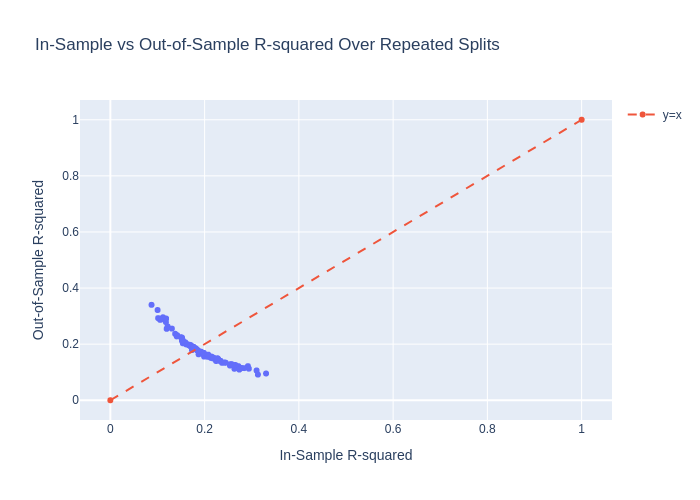

In [25]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
url = "https://raw.githubusercontent.com/KeithGalli/pandas/master/pokemon_data.csv"
# fail https://github.com/KeithGalli/pandas/blob/master/pokemon_data.csv
pokeaman = pd.read_csv(url)
pokeaman
# Linear form of model3_fit
linear_form = 'HP ~ Attack + Defense'
reps = 100  # Number of repetitions for re-sampling
in_sample_Rsquared = np.zeros(reps)
out_of_sample_Rsquared = np.zeros(reps)

# Perform repeated sampling, fitting, and evaluation
for i in range(reps):
    # 50-50 train-test split (without fixed seed for variability)
    pokeaman_train, pokeaman_test = train_test_split(pokeaman, train_size=0.5)
    
    # Fit model on training data
    model_fit = smf.ols(formula=linear_form, data=pokeaman_train).fit()
    
    # Collect in-sample R-squared
    in_sample_Rsquared[i] = model_fit.rsquared
    
    # Collect out-of-sample R-squared
    y_test = pokeaman_test.HP
    y_pred = model_fit.predict(pokeaman_test)
    out_of_sample_Rsquared[i] = np.corrcoef(y_test, y_pred)[0, 1]**2

# Create a DataFrame of results for visualization
results_df = pd.DataFrame({
    "In Sample Performance (Rsquared)": in_sample_Rsquared,
    "Out of Sample Performance (Rsquared)": out_of_sample_Rsquared
})

# Scatter plot of in-sample vs. out-of-sample R-squared values
fig = px.scatter(results_df, 
                 x="In Sample Performance (Rsquared)", 
                 y="Out of Sample Performance (Rsquared)",
                 title="In-Sample vs Out-of-Sample R-squared Over Repeated Splits",
                 labels={"In Sample Performance (Rsquared)": "In-Sample R-squared",
                         "Out of Sample Performance (Rsquared)": "Out-of-Sample R-squared"})

# Add a y=x line for reference
fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], name="y=x", line=dict(dash="dash")))

# Display plot
fig.show(renderer="png")


## Question 9 

Complex models, while they provide a better fit on training data or in some random train-test splits, are not guaranteed to perform as well in real-world scenarios where data is evolutionary and not stagnant. The simpler model offers more consistent generalizations (as seen in model6_fit) and better interpretability, and avoids the overfitting risks that is seen in the more complex model7_fit. This code emphasizes the principle of parsimony in model selection, where simpler models should be preferred unless you are in a situation where a complex model offers more consistency and significantly outperforms it in predictive accuracy.

**ChatGPT Pre-Lecture Summary: https://chatgpt.com/share/67345685-2e78-8003-b24a-5cfb88693e58**

Here’s a summary of our discussion today:

   1. JupyterHub Markdown: We discussed how to add line breaks in JupyterHub Markdown cells using double spaces, <br> tags, and blank lines.

   2. Loading the Titanic Dataset: You encountered a FileNotFoundError while trying to load titanic.csv. We resolved it by using the direct URL to the dataset hosted on GitHub. We also confirmed that the Embarked column needed renaming and adjustments to match the formula syntax.

   3. Handling Categorical Variables: To fit a logistic regression model with categorical predictors like sex and embarked, we used pd.get_dummies() to create binary indicator columns. By setting drop_first=True, we avoided the dummy variable trap (multicollinearity).

   4. Logistic Regression Interpretation:

        a. We looked at how logistic regression coefficients differ from linear regression coefficients. In logistic regression, coefficients represent changes in the log-odds of an outcome, rather than direct outcome changes.

        b. The odds ratio, derived from exponentiating coefficients, was also discussed. For instance, in the Titanic dataset, a negative coefficient for sex_male would indicate lower odds of survival for males.
        
5. Linear Regression Analogy for Logistic Regression:

      a. We explored interpreting logistic regression as if it were multivariate linear regression. Here, coefficients for each predictor could be loosely interpreted as if they linearly influence survival, providing a helpful (though approximate) perspective.
        
      b. Using this analogy, we considered the Titanic dataset predictors (sex, age, and embarked), imagining their coefficients as if they linearly impacted survival, though logistic regression better models binary outcomes like survival probability.
        
6. Plotting Logistic Regression Results with Noise:

    a. You requested a simulation of logistic regression results with added noise for the predictors. Using Plotly, we created code to plot the predicted probabilities for continuous and binary predictors, along with noisy data points to show variability.
    
    
Overall, we covered a full workflow for logistic regression modeling in Python, including dataset loading, variable transformation, model fitting, and interpretation, all while addressing common technical issues and exploring alternative perspectives. Let me know if you'd like more details on any part!

**NotebookLM Summary**

I used NotebookLM for pre-lecture ONLY, but I completely forgot to ask for a summary and I don't know how to acess old conversations. I've asked it how to do so and it is useless, so I looked online and saw that I should have saved the note. I thought NotebookLM saved chat history the same way ChatGPT does in case of a disconnection. That is my fault, I apologize.

**ChatGPT Post-Lecture Summary (LINK: https://chatgpt.com/share/6734e211-6b3c-8003-bbc9-9e000bd44dec)**

#### Summary: Model Complexity, Generalizability, and Interpretability in Multiple Linear Regression

In this exercise, we explored the trade-offs between model complexity, interpretability, and generalizability in the context of multiple linear regression. Using a Pokémon dataset, we compared progressively complex models (model6_fit and model7_fit) to understand when a simpler model might be preferable over a more complex one, even if the latter shows higher predictive accuracy in certain scenarios.

   1. Model Complexity and Overfitting:

        (a) Model6: This simpler model includes a manageable number of predictors and fewer interactions, focusing on statistically significant predictors.
        
        (b) Model7: A more complex model with higher-order interactions, including a four-way interaction term (Attack:Speed:Q("Sp. Def"):Q("Sp. Atk")). Although model7_fit initially showed better predictive performance than model6_fit, its complexity makes it more prone to overfitting, as it may capture idiosyncratic patterns specific to the training data.
        
   2. Evaluating Predictive Performance:

        (a) In repeated random train-test splits, model7_fit outperformed model6_fit in "out-of-sample" $R^2$. However, this does not guarantee generalizability, as the higher complexity can lead to overfitting, capturing noise rather than true patterns.

   3. The Importance of Generalizability:

        (a) We then tested the models in a more realistic predictive setting, training them on data from earlier Pokémon generations and testing them on later generations. This simulates a real-world scenario where data arrives sequentially, and models trained on current data must generalize to future, unseen data.
        
        (b) When using only Generation 1 data for training, both models showed reduced out-of-sample performance on later generations. However, model7_fit exhibited a more significant decline, suggesting that its complexity made it less generalizable compared to the simpler model6_fit.
        
   4. Interpretability and Parsimony:

        (a) Model interpretability is crucial in many applications. While complex models can sometimes yield better predictions, the increased number of interactions in model7_fit makes it challenging to interpret how each predictor influences the response variable (HP). In contrast, model6_fit is more straightforward, providing clear insights into the effects of individual predictors without excessive complexity.
        
        (b)Parsimonious models like model6_fit are often preferred when interpretability is important, as they strike a balance between simplicity and predictive power.
   5. Conclusion:

        (a) This exercise demonstrates that a simpler model can often be more desirable than a more complex one, especially when interpretability and generalizability are priorities. Although model7_fit initially seemed to offer better performance, the complex interactions it included made it more vulnerable to overfitting and less interpretable.
        
        (b) In summary, this analysis underscores the importance of choosing models that are as simple as possible while still meeting predictive goals. We should only opt for more complex models if they provide clear, consistent improvements in predictive performance across various testing scenarios.
        
This summary captures the main themes of model evaluation, emphasizing how a balance of simplicity, interpretability, and generalizability often outweighs raw predictive performance, especially in real-world settings. Let me know if you need further clarifications on any point!

**ChatGPT Session 3 Post-Lecture Summary (LINK: https://chatgpt.com/share/6736aa34-57c4-8003-be91-5b44dad02635)**


Here's a summary of what we've discussed today:

   1. High Condition Numbers in Models:

You mentioned that after centering and scaling your variables, the condition number of your regression model (using statsmodels) was still very high, indicating potential multicollinearity or numerical instability.
I provided suggestions to handle high condition numbers, including checking for multicollinearity using Variance Inflation Factor (VIF), reducing the number of predictors, applying Principal Component Analysis (PCA), or using regularized regression models like Ridge or Lasso.
Model Fitting Issues:

You encountered an error where model4 was not defined when trying to access its summary. I suggested making sure you correctly define and fit the model before trying to access its summary, and provided an example of how to do so with model4_CS_spec.

   2. Regression with Centered and Scaled Variables:

You successfully defined a model where you centered and scaled certain variables (e.g., Attack, Defense, Speed, etc.) to improve the model's stability. This change led to a much lower condition number (from 343.0 to 1.66), indicating better numerical stability.
Current Model Issue:

You were attempting to access the summary of model3_fit, but the error occurred because the model variable wasn't defined. You later fixed this by using the correct variable, model3_center_scale_fit, for the centered and scaled regression model.

Let me know if you would like further clarification or need additional help!






